# Naive Bayes

Naive Bayes es un algoritmo de clasificación que se basa en el teorema de Bayes y asume independencia condicional entre las características (predictores) dadas las clases. A pesar de su simplicidad, a menudo funciona sorprendentemente bien en muchos problemas de clasificación. Scikit-learn proporciona implementaciones del clasificador Na
ive Bayes. 

En el siguiente link puede encontrar la documentación completa de **Skikit-Learn**
[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)


-   Es un buen clasificador pero un mal predictor 
-   Se basan en el teorema de Bayes, haciendo la suposición de independencia condicional entre cada par de características dado el valor de la variable de clase

-   La regla de clasificación conociste en:

    $$P(y|x_1,...,x_n) \propto P(y) \prod P(x_i|y)$$
    $$ \hat{y} \Rightarrow arg Max \propto P(y) \prod P(x_i|y)$$


-   $P(y)$ es la frecuencia en la muestra de entrenamiento 
-   Si asumimos que $P(x_i|y)$ distribuye normal, entonces el algoritmo se conoce como el **Naive Bayes Gaussiano**
-   Se utiliza mucho con distribución multinomia, donde los pesos se calculan con las frecuencias relativas 
-   Otra forma de utilizar la multinomial conociste en utilizas el **Complemento del Naive Bayes**, los pesos se calculan teniendo encuentra los complementos de las clases
-   Podemos utilizar una distribución Bernoulli para cada característica  y se conoce como el **NAive Bayes Bernoulli** 
-   También es posible usar datos Categóricos 

## Ejemplo IRIS

### AJuste del modelo

Cargamos los datos 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_DF = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_DF['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

iris_DF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Vamos a utilizar el método de Naive Bayes Gaussiano, para ello cargamos los paquetes y funciones necesaria 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


Dividimos el conjunto de datos en test y train 

In [3]:
X_train,X_test,y_train,y_test=train_test_split(iris_DF[['sepal length (cm)',
                                                        'sepal width (cm)', 
                                                        'petal length (cm)', 
                                                        'petal width (cm)']],
                                            iris_DF['species'],
                                               test_size=0.2, 
                                               random_state=42)

Definimos y entrenamos el modelo

In [6]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb

GaussianNB()

A continuación me muestra el número de predicciones por clase y el porcentaje a priori

In [7]:
gnb.class_count_

array([40., 41., 39.])

In [8]:
gnb.class_prior_

array([0.33333333, 0.34166667, 0.325     ])

Media de cada característica por clase 

In [9]:
gnb.theta_

array([[4.99      , 3.4525    , 1.45      , 0.245     ],
       [5.9195122 , 2.77073171, 4.24146341, 1.32195122],
       [6.53333333, 2.96666667, 5.52051282, 2.        ]])

### Evaluación del modelo  

Cargamos las funciones y librerías necesarias 

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

Hacemos las predicciones dado los datos de test

In [10]:
y_pred = gnb.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

Matrix de confusion, vemos que pronostica perfecto

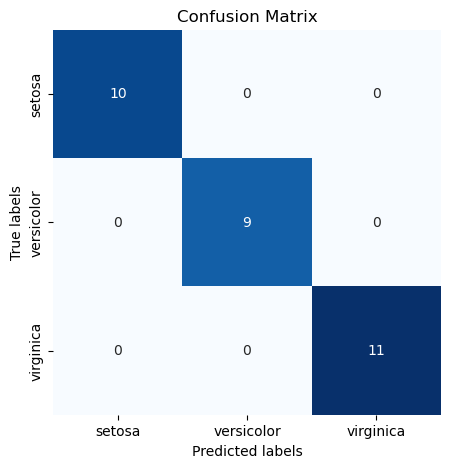

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

ax, fig = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(iris.target_names)
ax.yaxis.set_ticklabels(iris.target_names)

plt.show()

Por lo tanto la métricas deben ser perfectas, como se muestra a continuación 

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



y las curvas ROC deben ser perfectas 

In [39]:
y_test_df=pd.get_dummies(y_test)
y_score_1 = gnb.predict(X_test)
y_score=pd.get_dummies(y_score_1)
# Calcular las curvas ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Tres clases en el conjunto de datos Iris
    fpr[i], tpr[i], _ = roc_curve(y_test_df.iloc[:,i], y_score.iloc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

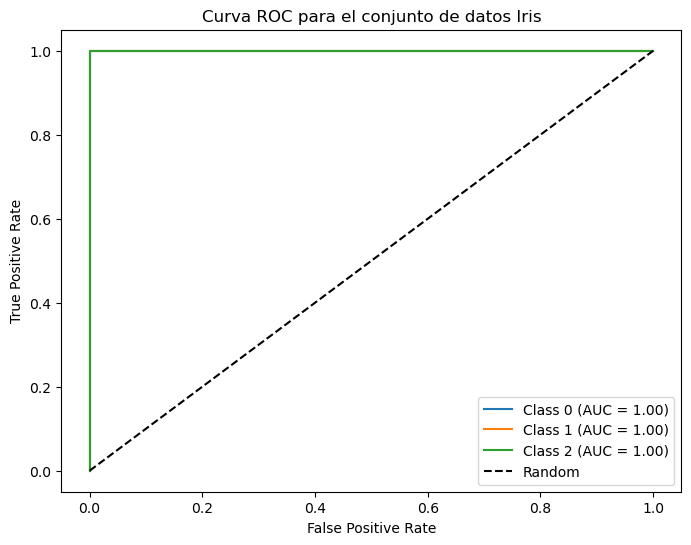

In [41]:
plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el conjunto de datos Iris')
plt.legend(loc='lower right')
plt.show()